In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, FuncFormatter, NullLocator
from scipy.optimize import curve_fit
plt.style.use('pablet')

In [5]:
data= pd.read_csv('table_4.csv')
M_B= data['M_B']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Galaxy       36 non-null     object 
 1   M_V          36 non-null     float64
 2   M_B          36 non-null     float64
 3   L_V          36 non-null     float64
 4   R_c          36 non-null     int64  
 5   rho_0        36 non-null     float64
 6   I_0          29 non-null     float64
 7   Total mass   29 non-null     float64
 8   (M/L)_0,V    21 non-null     float64
 9   (M/L)_tot,V  30 non-null     float64
 10  M_HI/M_tot   30 non-null     float64
 11  M_HI/L_B     35 non-null     float64
 12  v_r/sigma    18 non-null     object 
dtypes: float64(10), int64(1), object(2)
memory usage: 3.8+ KB


In [34]:
def Schechter(M, A, M_c, alpha):
    log_term1 = 0.4 * np.log(10) * A
    log_term2 = 0.4 * (M_c - M) * (alpha + 1)
    log_exp = -10 ** (0.4 * (M_c - M))

    # Combine terms in log space and then exponentiate
    return np.exp(log_term1 + log_term2 + log_exp)
    #return 0.4*np.log(10)*10**(0.4*(M_c-M)*(alpha+1))*np.exp(-10**(0.4)*(M_c-M))

min M_B: -17.5
max M_B: -7.6


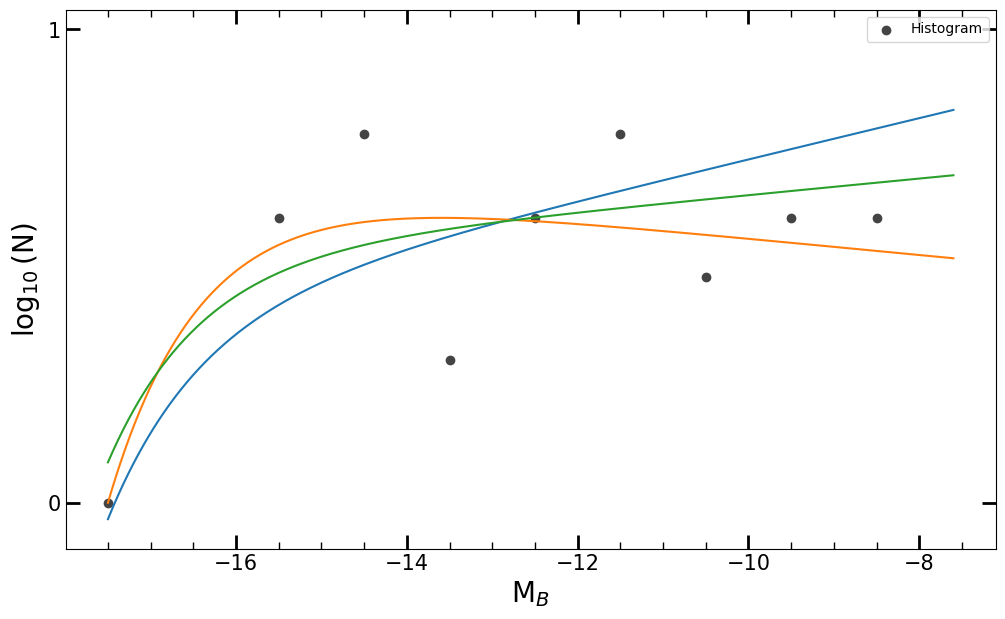

In [50]:
print('min M_B:', min(M_B))
print('max M_B:', max(M_B))
bins = np.arange(-18, -7, 1)

hist, edges= np.histogram(M_B, bins=bins)
centre= (edges[:-1]+edges[1:])/2
plt.scatter(centre, hist, c='#444444', label='Histogram')

m= np.linspace(min(M_B), max(M_B), 1000)
plt.plot(m, Schechter(m, 1, -17.5, -1.25))
plt.plot(m, Schechter(m, 1.7, -17, -0.9))
plt.plot(m, Schechter(m, 1.3, -17.5, -1.1))

plt.ylabel(r'$\log_{10}$(N)')
plt.xlabel(r'M$_B$')
plt.yscale('log')
def exponent_formatter(val, pos):
    return f"{int(np.log10(val))}"
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_formatter(FuncFormatter(exponent_formatter))
plt.gca().yaxis.set_minor_locator(NullLocator())
plt.ylim(0.8, 11)
plt.legend();

A: 1.899 ± 0.439
M_c: -16.106 ± 0.888
alpha: -0.85 ± 0.217


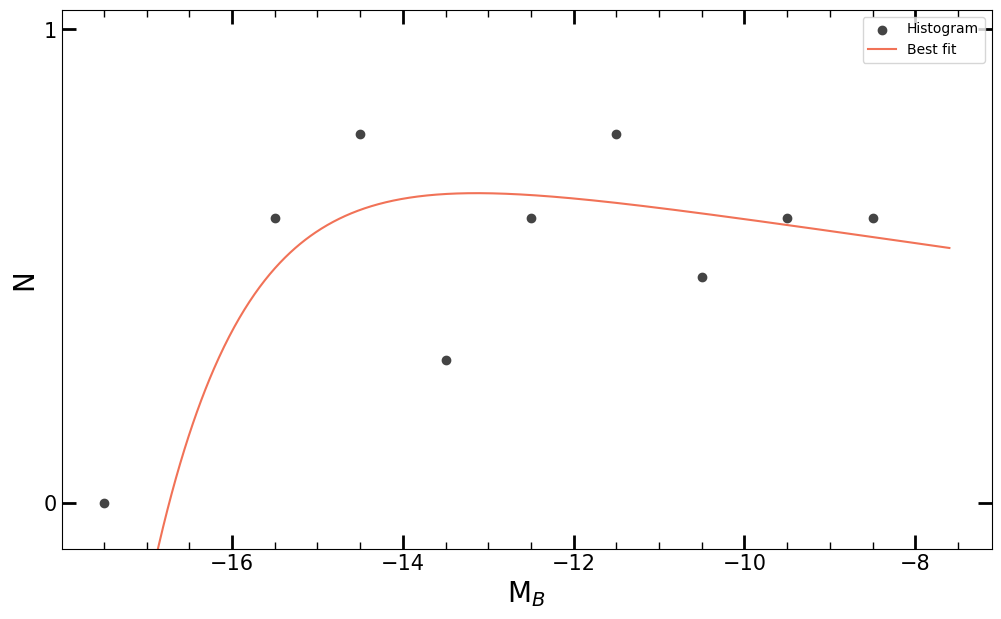

In [42]:
#Best fit
popt, pcov= curve_fit(Schechter, centre, hist, p0=[1, -17, -1.2])
perr= np.sqrt(np.diag(pcov))
fit_A= popt[0]
err_A= perr[0]
fit_M= popt[1]
err_M= perr[1]
fit_alpha= popt[2]
err_alpha= perr[2]
print('A:',round(fit_A, 3), '±',round(err_A, 3))
print('M_c:',round(fit_M, 3), '±',round(err_M, 3))
print('alpha:',round(fit_alpha, 3), '±',round(err_alpha, 3))

plt.scatter(centre, hist, c='#444444', label='Histogram')
plt.plot(m, Schechter(m,fit_A, fit_M, fit_alpha), c='#F17257', label='Best fit')
plt.ylabel('N')
plt.xlabel('M$_B$')
plt.yscale('log')
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_formatter(FuncFormatter(exponent_formatter))
plt.gca().yaxis.set_minor_locator(NullLocator())
plt.ylim(0.8, 11)
plt.legend();